In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as patches
import math

pd.options.mode.chained_assignment = None

In [69]:
data = pd.read_csv("data.csv")
data['humidex'] = 

,day,hour,roomTemperature,roomHumidity,roomHeatIndex,outTemperature,outHumidity,outHeatIndex
0,10/07/2020,20:28,30.5,44.4,30.90,30.25,45.0,30.65
1,10/07/2020,20:37,30.5,44.4,30.90,29.90,51.0,31.06
2,10/07/2020,20:38,30.4,44.7,30.81,29.90,51.0,31.06
3,10/07/2020,20:45,31.3,43.0,31.79,29.89,51.0,31.04
4,10/07/2020,20:50,30.9,44.7,31.50,29.89,51.0,31.04


In [86]:
data['outHumidex'] = data['outTemperature']+0.555*(6.112*10**(7.5*data['outTemperature']/(237.7+data['outTemperature']))*data['outHumidity']/100-10)
data['roomHumidex'] = data['roomTemperature']+0.555*(6.112*10**(7.5*data['roomTemperature']/(237.7+data['roomTemperature']))*data['roomHumidity']/100-10)
data.head()

,day,hour,roomTemperature,roomHumidity,roomHeatIndex,outTemperature,outHumidity,outHeatIndex,outHumidex,roomHumidex
0,10/07/2020,20:28,30.5,44.4,30.90,30.25,45.0,30.65,35.424951,35.684148
1,10/07/2020,20:37,30.5,44.4,30.90,29.90,51.0,31.06,36.263819,35.684148
2,10/07/2020,20:38,30.4,44.7,30.81,29.90,51.0,31.06,36.263819,35.595158
3,10/07/2020,20:45,31.3,43.0,31.79,29.89,51.0,31.04,36.246991,36.629811
4,10/07/2020,20:50,30.9,44.7,31.50,29.89,51.0,31.04,36.246991,36.405821


(array([  0.,   5.,   9.,  21.,  33.,  45.,  57.,  69.,  81.,  93., 105.,
        117., 129., 141., 153., 165.]),
 <a list of 16 Text xticklabel objects>)

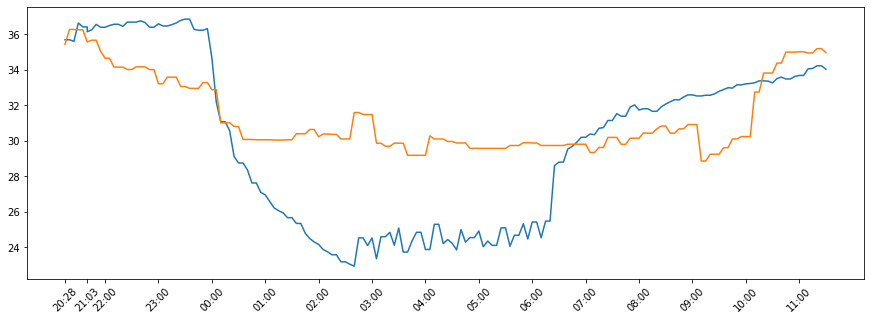

In [87]:
def generate_xticks(hours):
    x_ticks = []
    visited = set()
    for hour in hours:
        h = hour.split(":")[0]
        if h not in visited:
            x_ticks.append(hour)
        visited.add(h)
    return x_ticks


fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15, 5)
ax.plot(data['hour'], data['roomHumidex'])
ax.plot(data['hour'], data['outHumidex'])

xticks = generate_xticks(data['hour'])
ax.set_xticks(xticks)
plt.xticks(rotation=45)




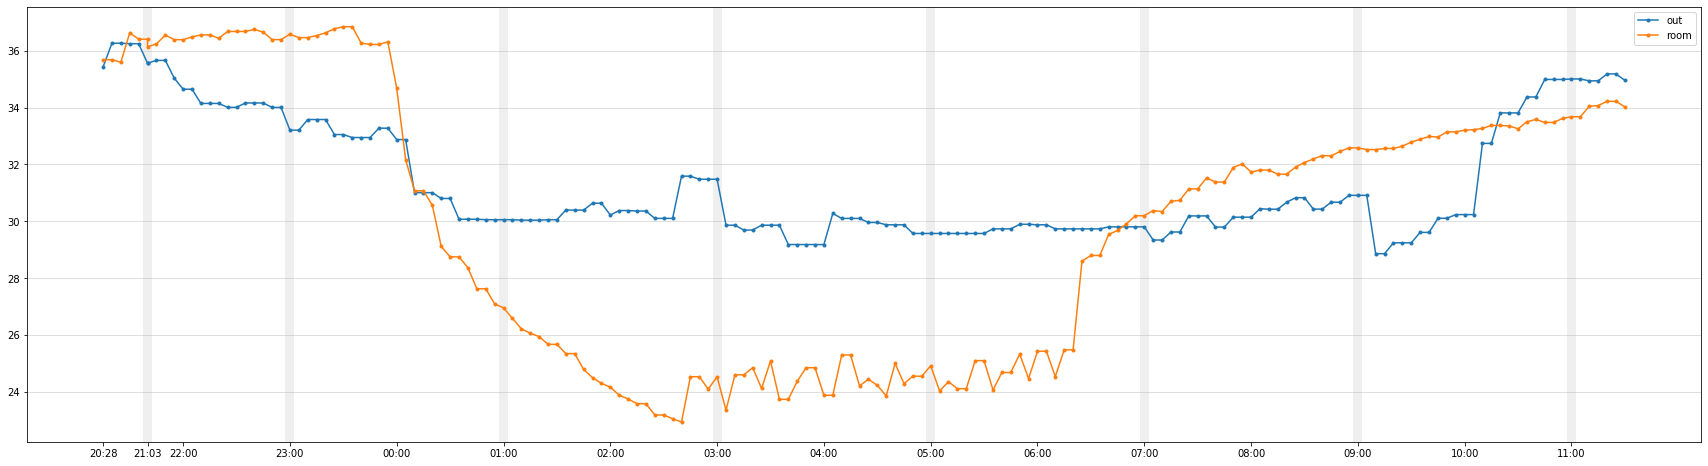

In [90]:
def drawLinePlot(data):
    plt.figure(figsize=(30,8))
    ax = plt.gca()
    legend = []
    marker_sizes = np.linspace(30, 20, len(data))
    xticks = generate_xticks(data['hour'])

    #legend.append(legend_function(key))
    #print(key)
    ax.plot(data['hour'], data['outHumidex'], '.-')
    ax.plot(data['hour'], data['roomHumidex'], '.-')
        #sns.lineplot(x=range(0,len(quantiles)), y='front_abs_dist', ax=ax, data=quantiles)
    ax.set_xticks(xticks)

    ax.grid(alpha=0.5, axis = 'y')

    ax.grid(False, axis = 'x')
    y_min, y_max = ax.get_ylim()

    
    color_shade = {0: '#ffffffff', 1:'#efefefff'}
    
    for i, tick in enumerate(ax.get_xticks()):
        rect = patches.Rectangle((tick-0.5,0),1,y_max,linewidth=0,edgecolor='None',facecolor=color_shade[i%2], zorder=-1)
        ax.add_patch(rect)
    plt.ylim(y_min,y_max)
    ax.legend(['out', 'room'])
    #ax.set_yticklabels(np.arange(0, 0.5, 0.05))

    #_= ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    #ax.hlines(0, 0, 16)
    plt.show()
    
drawLinePlot(data)